# Quantum Mechanics Analysis (2D)

Time independent Schrodinger equation in 2D:
$$ -\frac{\hbar^2}{2m} \left(\frac{\partial^2\psi}{\partial x^2} +\frac{\partial^2\psi}{\partial y^2}\right) + V(x)\psi(x) = E \psi(x) $$
Kinetic Energy Operator (matrix):
$$ T = -\frac{\hbar^2}{2m} \left(I\otimes D + D\otimes I \right) $$
where,
$$ D = \begin{bmatrix}
-2 & 1 & 0 & \ldots & 0 \\
1 & -2 & 1 & \ldots & 0 \\
0 & 1 & -2 & \ldots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \ldots & -2
\end{bmatrix} $$
Hamiltonian Operator (matrix):
$$ H = T + V $$
The Schrodinger equation is;
$$ H\psi = E\psi $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.linalg import eigh
import scipy.constants as const
from scipy import sparse
from scipy.sparse.linalg import eigsh

In [2]:
hcut = 1
mass = 1
# hcut = const.hbar
# mass = const.electron_mass

L = 4
# L = 50e-9  # Domain size
N = 50  # Number of grid points
x = np.linspace(-L, L, N)
y = np.linspace(-L, L, N)
X, Y = np.meshgrid(x, y)

## Potentials

### Potential Well:
$$ V(x, y) = 0 \quad ; \quad -L_x<x<L_x,\,-L_y<y<L_y $$
$$ = V_0 \quad ; \quad otherwise $$

### 3D LHO Potential:
$$ V(x) = \frac{1}{2} m(\omega_x^2 x^2 + \omega_y^2 y^2) $$

In [3]:
# potential
def potential2d(x, y, omega_x, omega_y):
    return 0.5*mass*(omega_x**2 *x**2 +omega_y**2 *y**2)

wx, wy = 1.0, 1.0 # INPUT
# [wx, wy, wz] = np.array([12, 12])*const.electron_volt/const.hbar  # INPUT

Vxy = potential2d(X, Y, wx, wy)

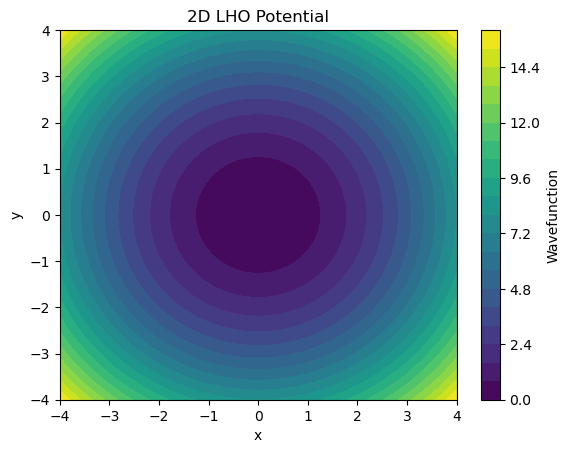

In [4]:
plt.contourf(X, Y, Vxy, levels=20, cmap='viridis')
plt.colorbar(label='Wavefunction')
plt.title('2D LHO Potential')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Solution of eigenvalue equation

### Using **`eigh`**

### Using **`eigsh`**

In [5]:
dx = x[1] - x[0]
dy = y[1] - y[0]

diags = np.array([np.ones(N), -2*np.ones(N), np.ones(N)])
D = sparse.spdiags(diags, np.array([-1,0,1]), N, N)
T_x = -hcut**2/(2*mass) * (1/dx**2) * D
T_y = -hcut**2/(2*mass) * (1/dx**2) * D
T = sparse.kron(T_x, sparse.eye(N)) + sparse.kron(sparse.eye(N), T_y)

V = sparse.diags(Vxy.flatten(), 0)
H = T + V
eigenvals, eigenvecsT = eigsh(H, k=50, which='SM')

### Defining Functions for normalized eigenvectors

In [6]:
def eig_val(n):
    return eigenvals[n]
def eig_vec(n):
    eigf = eigenvecsT[:, n].reshape(N, N)
    eigfm2 = eigf.conjugate()*eigf
    eigf = eigf/np.sum(eigfm2*dx*dy)**0.5
    return eigf
def prob_den(n):
    eigv = eigenvals[n]
    eigf = eigenvecsT[:, n].reshape(N, N)
    eigfm2 = eigf.conjugate()*eigf
    eigf = eigf/np.sum(eigfm2*dx*dy)**0.5
    eigfm2 = eigf.conjugate()*eigf
    return eigfm2


### Overview of Solution

In [ ]:
np.sum(np.abs(eig_vec(14))**2 *dx*dy)

0.9999999999999997

In [ ]:
for i in range(20):
    print(f'n={i}, E{i}={eig_val(i)}')

n=0, E0=0.9983315464456172
n=1, E1=1.9949929859467852
n=2, E2=1.994992985946824
n=3, E3=2.9883560943599483
n=4, E4=2.9883560943599554
n=5, E5=2.9916544254479707
n=6, E6=3.9788229321254396
n=7, E7=3.978822932125447
n=8, E8=3.985017533861154
n=9, E9=3.9850175338611695
n=10, E10=4.968505333033987
n=11, E11=4.968505333034057
n=12, E12=4.975484371626653
n=13, E13=4.975484371626655
n=14, E14=4.978380642274321
n=15, E15=5.964741049841949
n=16, E16=5.964741049841967
n=17, E17=5.965166772535184
n=18, E18=5.965166772535195
n=19, E19=5.968847480039787


### Plot for a state

**cmap**: 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

Use **`eig_vec(n)`** for the plotting of wavefunctions and use **`prob_den(n)`** for the plotting of probability densities.

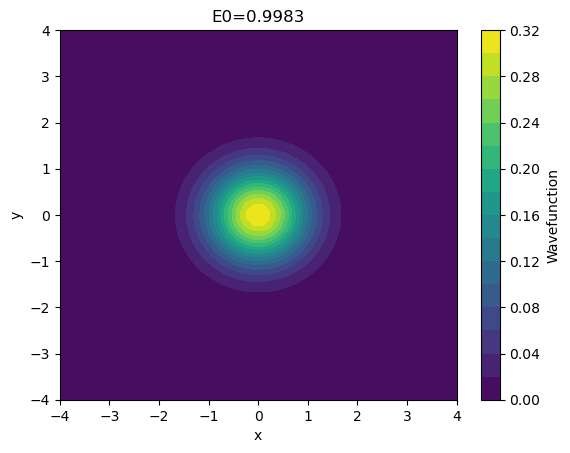

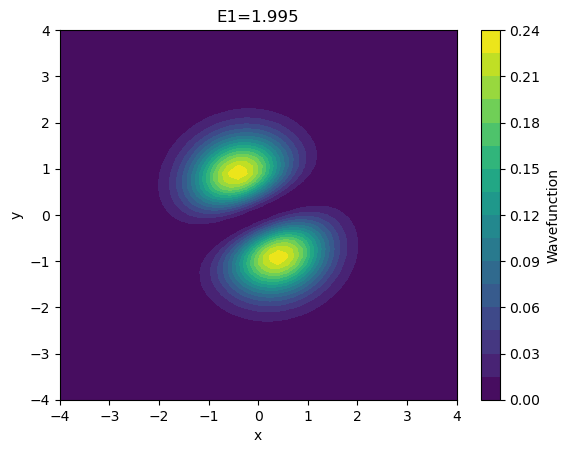

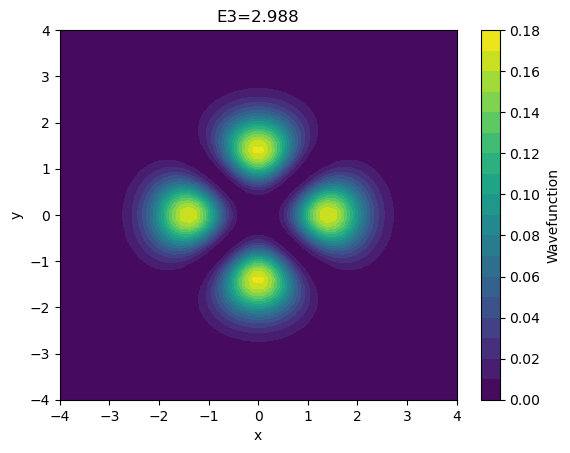

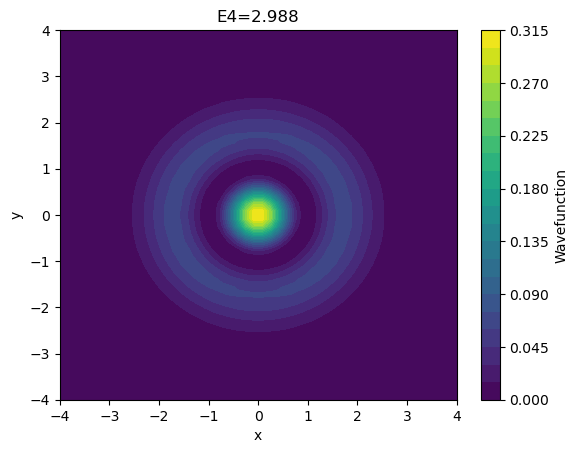

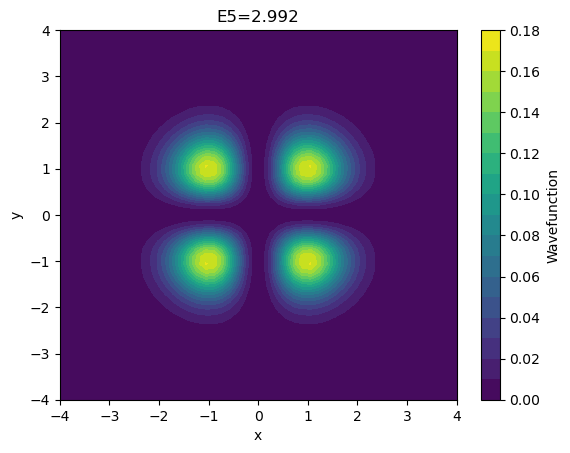

In [18]:
for i in np.array([0,1,3,4,5]):  # INPUT
    plt.contourf(X, Y, prob_den(i), levels=20, cmap='viridis')
    plt.colorbar(label='Wavefunction')
    plt.title(f'E{i}={eig_val(i):.4}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [20]:
n = 3       # INPUT
fig2 = go.Figure(data=[go.Surface(z=prob_den(n), x=x, y=y)])

fig2.update_layout(title=f'Probability Density for n={n}; E{n}={eig_val(n)}',
        scene=dict(xaxis_title='x', yaxis_title='y', zaxis_title='Probability Density'))
fig2.show()

## Superposition

In [11]:
ns = np.array([0,1,3,7,11,16])  # INPUT
cs = np.array([10, 6, 4, 5, 4, 7])   # INPUT
cs = cs/np.sum(cs**2)**0.5

psis = eig_vec(0)*0
for i in range(ns.size):
    psii = cs[i]*eig_vec(ns[i])
    psis += psii

state = 0 	 corresponding ratio = 0.6428243465332251
state = 1 	 corresponding ratio = 0.38569460791993504
state = 3 	 corresponding ratio = 0.25712973861329
state = 7 	 corresponding ratio = 0.32141217326661253
state = 11 	 corresponding ratio = 0.25712973861329
state = 16 	 corresponding ratio = 0.44997704257325755


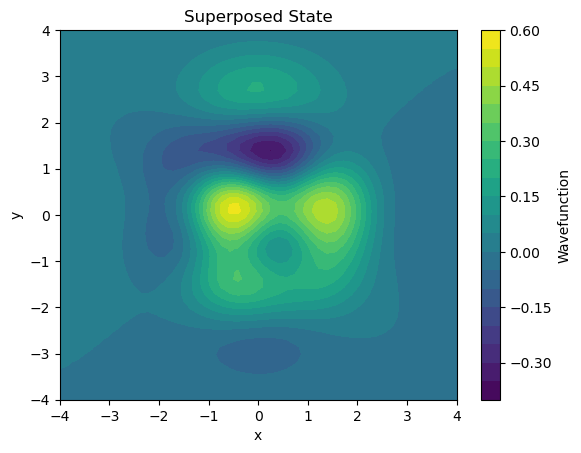

In [12]:
for i in range(len(ns)):
    print(f'state = {ns[i]} \t corresponding ratio = {cs[i]}')

plt.contourf(X, Y, psis, levels=20, cmap='viridis')
plt.colorbar(label='Wavefunction')
plt.title('Superposed State')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [19]:
fig3 = go.Figure(data=[go.Surface(z=np.abs(psis)**2, x=x, y=y)])

fig3.update_layout(title=f'Probability Density of Superposed State',
        scene=dict(xaxis_title='x', yaxis_title='y', zaxis_title='Probability Density'))
fig3.show()